___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.researchgate.net/profile/Sandip-Lahiri/publication/26543790/figure/fig1/AS:310045121236994@1450931925958/A-schematic-diagram-of-the-support-vector-regression-using-e-sensitive-loss-function.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://www.researchgate.net/profile/Sandip-Lahiri/publication/26543790/figure/fig1/AS:310045121236994@1450931925958/A-schematic-diagram-of-the-support-vector-regression-using-e-sensitive-loss-function.png</p>

### <font color= #2E9AFE> Tema:Máquinas de Soporte Vectorial basadas en Regresión (SVR)</font>

**¿Qué es?**

- Es un algoritmo de regresión que soporta tanto problemas lineales como no lineales. 

- La idea es seleccionar el hiperplano regresor que mejor se ajuste a nuestro conjunto de datos de entrenamiento. 

- Se basa en considerar una distancia margen $\varepsilon$, de modo que esperamos que todos los datos se encuentren en una banda o tubo entorno a nuestro hiperplano. A la hora de definir el hiperplano sólo se consideran los datos que tengan una distancia más de $\varepsilon$ de nuestro hiperplano. En este caso esos datos serán los considerados como vectores soporte.

**Diferencia regresión simple y SVR**

En la regresión simple, se busca minimizar la tasa del error, mientras que en el SVR se busca ajustar el error dentro de cierto umbral, lo que significa que el trabajo del SVR es aproximar el mejor valor dentro de un margen dado llamado "e-tubo". 

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://www.mdpi.com/applsci/applsci-10-03086/article_deploy/html/images/applsci-10-03086-g004.png" width="450px" height="280px" />

**Algunos términos**

1. Hiperplano: es la línea que ayuda a predecir la variable target
2. Kernel: En el SVR, la regresión se realiza en una dimensión superior. Para hacer eso, necesitamos una función que debería asignar los puntos de datos a su dimensión superior. Esta función se denomina kernel. 
3. Líneas de soporte: estas son las dos líneas que se dibujan alrededor del hiperplano a una distancia de ε (épsilon). Se utiliza para crear un margen entre los puntos de datos.
4. Vector de soporte: Es el vector que se utiliza para definir el hiperplano o podemos decir que estos son los puntos de datos extremos en el conjunto de datos que ayudan a definir el hiperplano. Estos puntos de datos se encuentran cerca del límite.

**El truco del Kernel**

El truco del kernel es una técnica utilizada en las máquinas de vectores soporte, para manejar problemas no lineales. En lugar de transformar explícitamente los datos a un espacio de mayor dimensionalidad, el truco del kernel permite calcular los productos escalares en ese espacio sin tener que realizar realmente la transformación. Esto permite que se pueda trabajar con relaciones no lineales entre las variables.


**Algunos tipos de kernel**
- Lineal
$$K(x,x*)=x \cdot x^{*}$$
- Polinomial 
$$K(x,x*)=(x \cdot x^{*} +1)^{d}$$
- Gaussian Radial Basis 
$$K(x,x*)=\exp^{-\frac{\|x-x^{*}\|^{2}}{2\sigma^{2}}}$$

**Hiperparámetros del SVR**

Los hiperparámetros son los valores que el nosotros definimos antes del entrenamiento y no se ajustan automáticamente. Estos hiperparámetros controlan aspectos como la complejidad del modelo, la regularización y la tasa de aprendizaje.

- C
- El parámetro respectivo del kernel que decidas utilizar
- Epsilon

**Cuándo usarlo?:**
- Relaciones lineales
- Cuando tenemos pocos datos
- Cuando hay muchos atípicos
- Evitar el overfitting al tener pocos datos
- Este algoritmo funciona muy bien si se tienen los datos limpios. Si los datos están muy dispersos, no se podrá crear una fórmula adecuada.
- Se recomienda estandarizar los datos previamente.
  
**Cuándo no usarlo?:**
- No es adecuado para conjuntos de datos grandes. Lleva mucho tiempo el entrenamiento
- Muchas variables
- Cuando se necesita interpretabilidad
- Datos con muchas variables categóricas



In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import (linear_kernel,polynomial_kernel,rbf_kernel)

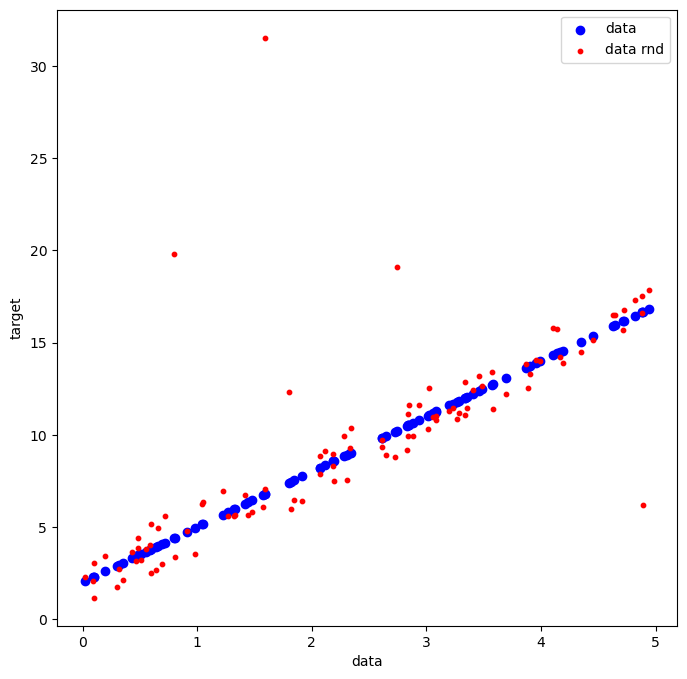

In [15]:
#%% generacion de los datos
rng = np.random.RandomState(0)

# #############################################################################
# Generar datos
X = 5 * rng.rand(100, 1)
y = np.ravel(3*X+2)
# Añadir ruido a las variables
yrnd = y + 3 * (0.5 - rng.rand(X.shape[0]))
yrnd[::20] += 50 * (0.5 - rng.rand(X.shape[0]//20))

X_plot = np.linspace(0, 5, len(X))[:, None]

#Graficar datos
plt.figure(figsize=(8,8))
plt.scatter(X, y, c='b', label='data')
plt.scatter(X, yrnd, c='r', s=10, label='data rnd',zorder=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

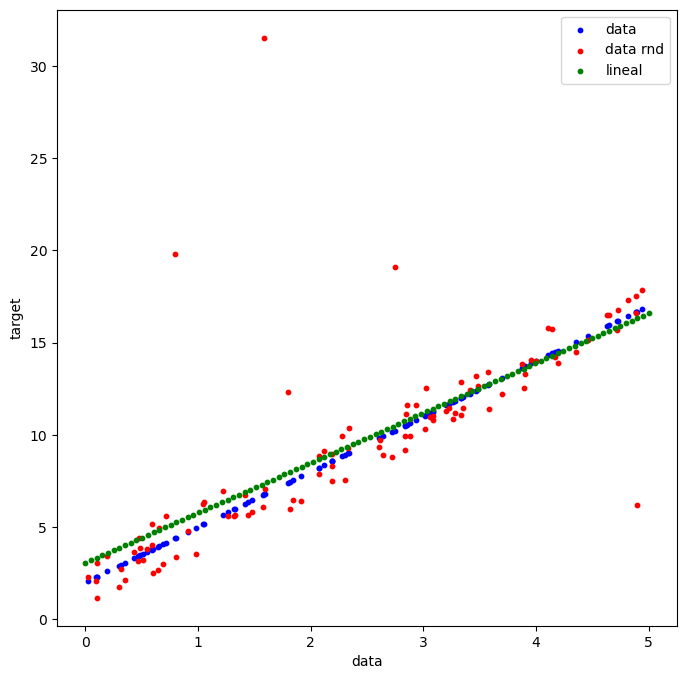

In [16]:
#Comparar con regresión lineal
from sklearn.linear_model import LinearRegression

modelo_lin = LinearRegression().fit(X,yrnd)
Ylin_plot = modelo_lin.predict(X_plot)

plt.figure(figsize=(8,8))
plt.scatter(X, y, c='b', s=10, label='data')
plt.scatter(X, yrnd, c='r', s=10, label='data rnd',zorder=2)
plt.scatter(X_plot, Ylin_plot, c='g', s=10, label='lineal',zorder=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

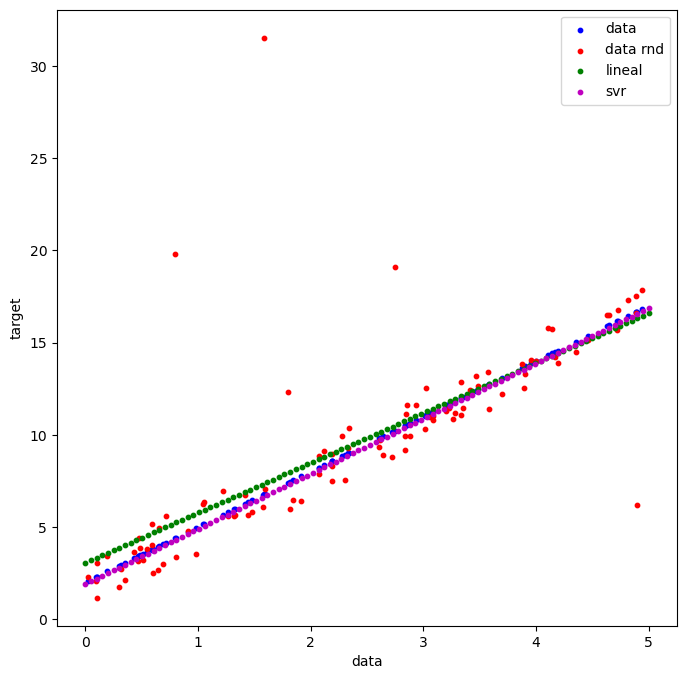

In [17]:
#¿Cómo se vería con el svr?
epsilon = 0.1 #hiperparámetro
C = 1 #hiperparametro
model_svr = SVR(kernel='linear', epsilon=epsilon, C=C)
model_svr.fit(X,yrnd)
Ysvr_plot = model_svr.predict(X_plot)

plt.figure(figsize=(8,8))
plt.scatter(X, y, c='b', s=10, label='data')
plt.scatter(X, yrnd, c='r', s=10, label='data rnd',zorder=2)
plt.scatter(X_plot, Ylin_plot, c='g', s=10, label='lineal',zorder=2)
plt.scatter(X_plot, Ysvr_plot, c='m', s=10, label='svr',zorder=2)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()


La línea del SVR (rosa) se acerca mucho a los valores sin ruido (azul) y tiene más inmunidad a los outliers, esto ocurre por la función de costo. Un valor grande (outlier) ya no se eleva al cuadrado, osea que sólo se afecta de forma lineal. 


In [18]:
#Dimensión de los datos originales
np.shape(X)

(100, 1)

In [19]:
#dimensión de los datos después de la transformación del kernel

K_X =  linear_kernel(X)
#K_X =  polynomial_kernel(X)
#K_X =  rbf_kernel(X)

np.shape(K_X)

(100, 100)

#### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yrnd, test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [21]:
#Escalamiento de los datos
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [22]:
#SVR
epsilon = 0.1 #hiperparámetro que hay que tunear --> estos hay que modificarlos para cada problema
C = 1 #hiperparámetro que hay que tunear --> estos hay que modificarlos para cada problema
#Kernel Lineal
model_svr = SVR(kernel='linear', epsilon=epsilon, C=C)
#Kernel Radial
epsilon= 0.1 #hiperparámetro que hay que tunear
C = 1
#model_svr = SVR(kernel='rbf', epsilon=epsilon, C=C)

#Entreno los datos con el train
model_svr.fit(X_train,y_train)

#Predicciones contra el test
Ypred = model_svr.predict(X_test)

#R2
print('R2 = %0.4f'%model_svr.score(X_test,y_test))

#MSE
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,Ypred))

R2 = 0.8852
MSE 2.4541154598428827


### Ejemplo: Cómo se ven los diferentes tipos de kernel?

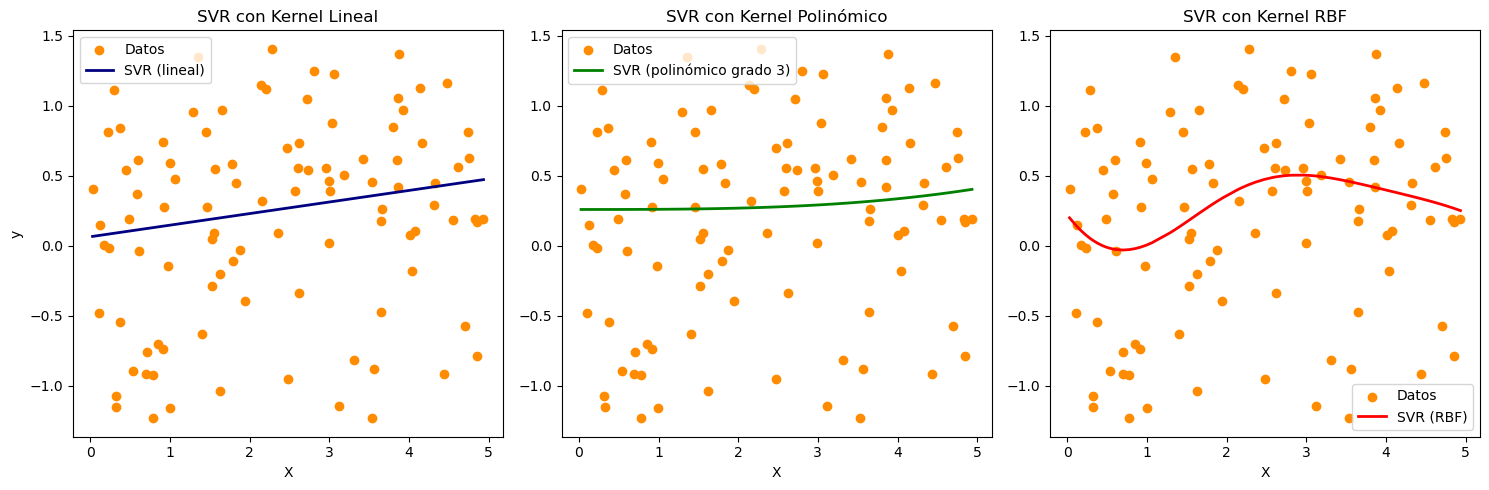

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generar datos sintéticos no lineales
np.random.seed(42)
X_nuevo = np.sort(5 * np.random.rand(100, 1), axis=0)
y_nuevo = np.sin(X).ravel() + np.random.normal(0, 0.2, X_nuevo.shape[0])

# Crear modelos SVR con diferentes kernels
svr_linear = SVR(kernel='linear', C=100, epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=0.1)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Ajustar los modelos
y_pred_linear = svr_linear.fit(X_nuevo, y_nuevo).predict(X_nuevo)
y_pred_poly = svr_poly.fit(X_nuevo, y_nuevo).predict(X_nuevo)
y_pred_rbf = svr_rbf.fit(X_nuevo, y_nuevo).predict(X_nuevo)

plt.figure(figsize=(15, 5))

# Gráfico para el kernel lineal
plt.subplot(1, 3, 1)
plt.scatter(X_nuevo, y_nuevo, color='darkorange', label='Datos')
plt.plot(X_nuevo, y_pred_linear, color='navy', lw=2, label='SVR (lineal)')
plt.title('SVR con Kernel Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Gráfico para el kernel polinómico
plt.subplot(1, 3, 2)
plt.scatter(X_nuevo, y_nuevo, color='darkorange', label='Datos')
plt.plot(X_nuevo, y_pred_poly, color='green', lw=2, label='SVR (polinómico grado 3)')
plt.title('SVR con Kernel Polinómico')
plt.xlabel('X')
plt.legend()

# Gráfico para el kernel RBF
plt.subplot(1, 3, 3)
plt.scatter(X_nuevo, y_nuevo, color='darkorange', label='Datos')
plt.plot(X_nuevo, y_pred_rbf, color='red', lw=2, label='SVR (RBF)')
plt.title('SVR con Kernel RBF')
plt.xlabel('X')
plt.legend()

plt.tight_layout()
plt.show()


## Ejemplo tuneando hiperparámetros

#### Métodos de tuneo de hiperparámetros + cross validation

Con cross validation podemos "tunear" los hiperparámetros. 

- Decidir cuál tipo de kernel es mejor
- Tunear el valor de C
- Tunear los parámetros correspondientes al kernel

Para hacer esto, vamos a dividir los datos de "entrenamiento" en entrenamiento y validación. 
- Buscamos los mejores hiperparámetros en el train
- Observamos en la validación las métricas de performance
- Test se guarda aparte y nunca se toca hasta el final.


In [24]:
#pip install scikit-optimize

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy.stats import loguniform
from skopt import BayesSearchCV
from skopt.space import Real

n_samples = 10000
n_features = 10
test_size = 1000
random_state = 42
np.random.seed(random_state)

X = np.zeros((n_samples, n_features))
X[:, 0] = np.random.uniform(-5, 5, n_samples)
X[:, 1] = np.random.normal(0, 3, n_samples)
X[:, 2] = np.random.uniform(-10, 10, n_samples)
if n_features > 3: X[:, 3] = np.random.normal(5, 2, n_samples)

y = np.zeros(n_samples)
y += 2 * X[:, 0] + 5
y += 0.5 * (X[:, 1] ** 2) - 3 * X[:, 1]
y += 10 * np.sin(X[:, 2] / 2)
y += 0.7 * X[:, 0] * X[:, 3]
noise = np.random.normal(0, 2, n_samples) * (1 + 0.1 * np.abs(X[:, 0]))
y += noise

# split into train, validation, test datasets
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=test_size, random_state=random_state)


In [26]:
# Definimos Pipeline y CV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GRID SEARCH
param_grid = {
    "svr__C": [0.1, 1, 10],
    "svr__epsilon": [0.01, 0.1, 0.3],
    "svr__gamma": [0.01, 0.1, 1],
    "svr__kernel": ["rbf"]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv,
                           scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parametros (Grid):", grid_search.best_params_)
print("MSE (Grid - Val):", mean_squared_error(y_val, grid_search.predict(X_val)))

# RANDOM SEARCH

param_dist = {
    "svr__C": loguniform(1e-3, 10),
    "svr__epsilon": loguniform(1e-3, 0.3),
    "svr__gamma": loguniform(1e-3, 1),
    "svr__kernel": ["rbf"]
}

random_search = RandomizedSearchCV(pipe, param_distributions=param_dist,
                                   n_iter=30, cv=cv,
                                   scoring="neg_mean_squared_error",
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("\nMejores parametros (Random):", random_search.best_params_)
print("MSE (Random - Val):", mean_squared_error(y_val, random_search.predict(X_val)))


# BAYESIAN OPTIMIZATION

search_spaces = {
    "svr__C": Real(1e-3, 10, prior="log-uniform"),
    "svr__epsilon": Real(1e-3, 0.3, prior="log-uniform"),
    "svr__gamma": Real(1e-3, 1.0, prior="log-uniform"),
    "svr__kernel": ["rbf"]
}

bayes_search = BayesSearchCV(pipe, search_spaces=search_spaces,
                             n_iter=30, cv=cv,
                             scoring="neg_mean_squared_error",
                             random_state=42, n_jobs=-1)
bayes_search.fit(X_train, y_train)

print("\nMejores parametros (Bayes):", bayes_search.best_params_)
print("MSE (Bayes - Val):", mean_squared_error(y_val, bayes_search.predict(X_val)))



Mejores parametros (Grid): {'svr__C': 10, 'svr__epsilon': 0.3, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
MSE (Grid - Val): 12.08596395448019

Mejores parametros (Random): {'svr__C': np.float64(6.245139574743075), 'svr__epsilon': np.float64(0.24659691172104828), 'svr__gamma': np.float64(0.2661901888489056), 'svr__kernel': 'rbf'}
MSE (Random - Val): 12.472263291060461

Mejores parametros (Bayes): OrderedDict({'svr__C': 10.0, 'svr__epsilon': 0.003698538306769837, 'svr__gamma': 0.4339421263701824, 'svr__kernel': 'rbf'})
MSE (Bayes - Val): 8.768661598796582


**Pasos después del tuneo de hiperparámetros**

1. Obtener los mejores hiperparámetros
2. Volver a entrenar un nuevo modelo con los mejores hiperparámetros
    - Crear un nuevo SVR con esos hiperparámetros
    - Entrenar ese nuevo modelo con todo el conjunto de datos de entrenamiento, que incluye tanto X_train como X_val
3. Evaluar en el conjunto de prueba (X_test)


In [27]:
# Evaluación final en TEST

# Tomamos el mejor de los tres (bayesiano)
best_model = bayes_search.best_estimator_

# Reentrenamos con todo train+val
best_model.fit(X_tv, y_tv)

# Evaluamos en test
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("\nFinal MSE on test set (Bayes best):", mse_test)


Final MSE on test set (Bayes best): 11.46543736308118


### Cómo sé si está sobreajustand?

In [28]:
# Medimos en el train, validation y test

from sklearn.metrics import mean_squared_error

y_pred_train = best_model.predict(X_train)
print("MSE (train):", mean_squared_error(y_train, y_pred_train))

y_pred_val = best_model.predict(X_val)
print("MSE (val):", mean_squared_error(y_val, y_pred_val))

y_pred_test = best_model.predict(X_test)
print("MSE (test):", mean_squared_error(y_test, y_pred_test))


MSE (train): 8.037900114616281
MSE (val): 7.419447522150916
MSE (test): 11.46543736308118


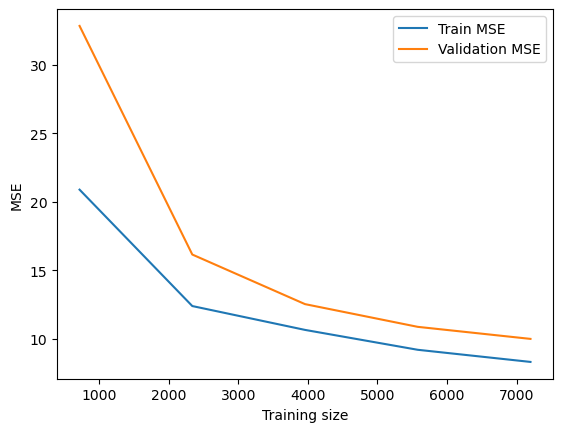

In [29]:
#Curva de aprendizaje

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_tv, y_tv,
    cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_mse = -train_scores.mean(axis=1)
val_mse = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_mse, label="Train MSE")
plt.plot(train_sizes, val_mse, label="Validation MSE")
plt.xlabel("Training size")
plt.ylabel("MSE")
plt.legend()
plt.show()
